In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [3]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape


(583, 11)

In [6]:
df['gender']=df['gender'].apply(lambda x:1 if x=='Male' else 0)


<Axes: xlabel='gender'>

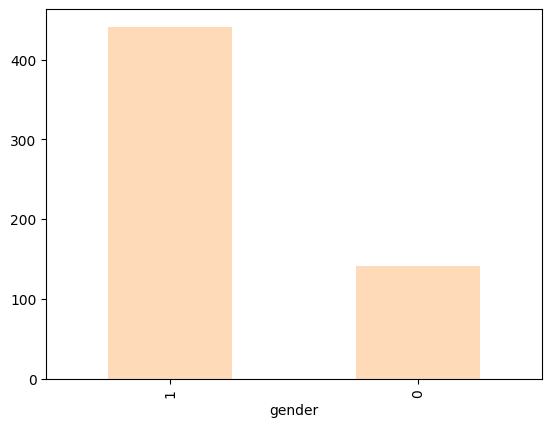

In [8]:
df['gender'].value_counts().plot.bar(color='peachpuff')


In [9]:
df.isnull().sum()


,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,4


In [11]:
df['alkphos'].mean()


0.9470639032815197

In [12]:
df=df.fillna(df['alkphos'].mean())

<Axes: xlabel='age'>

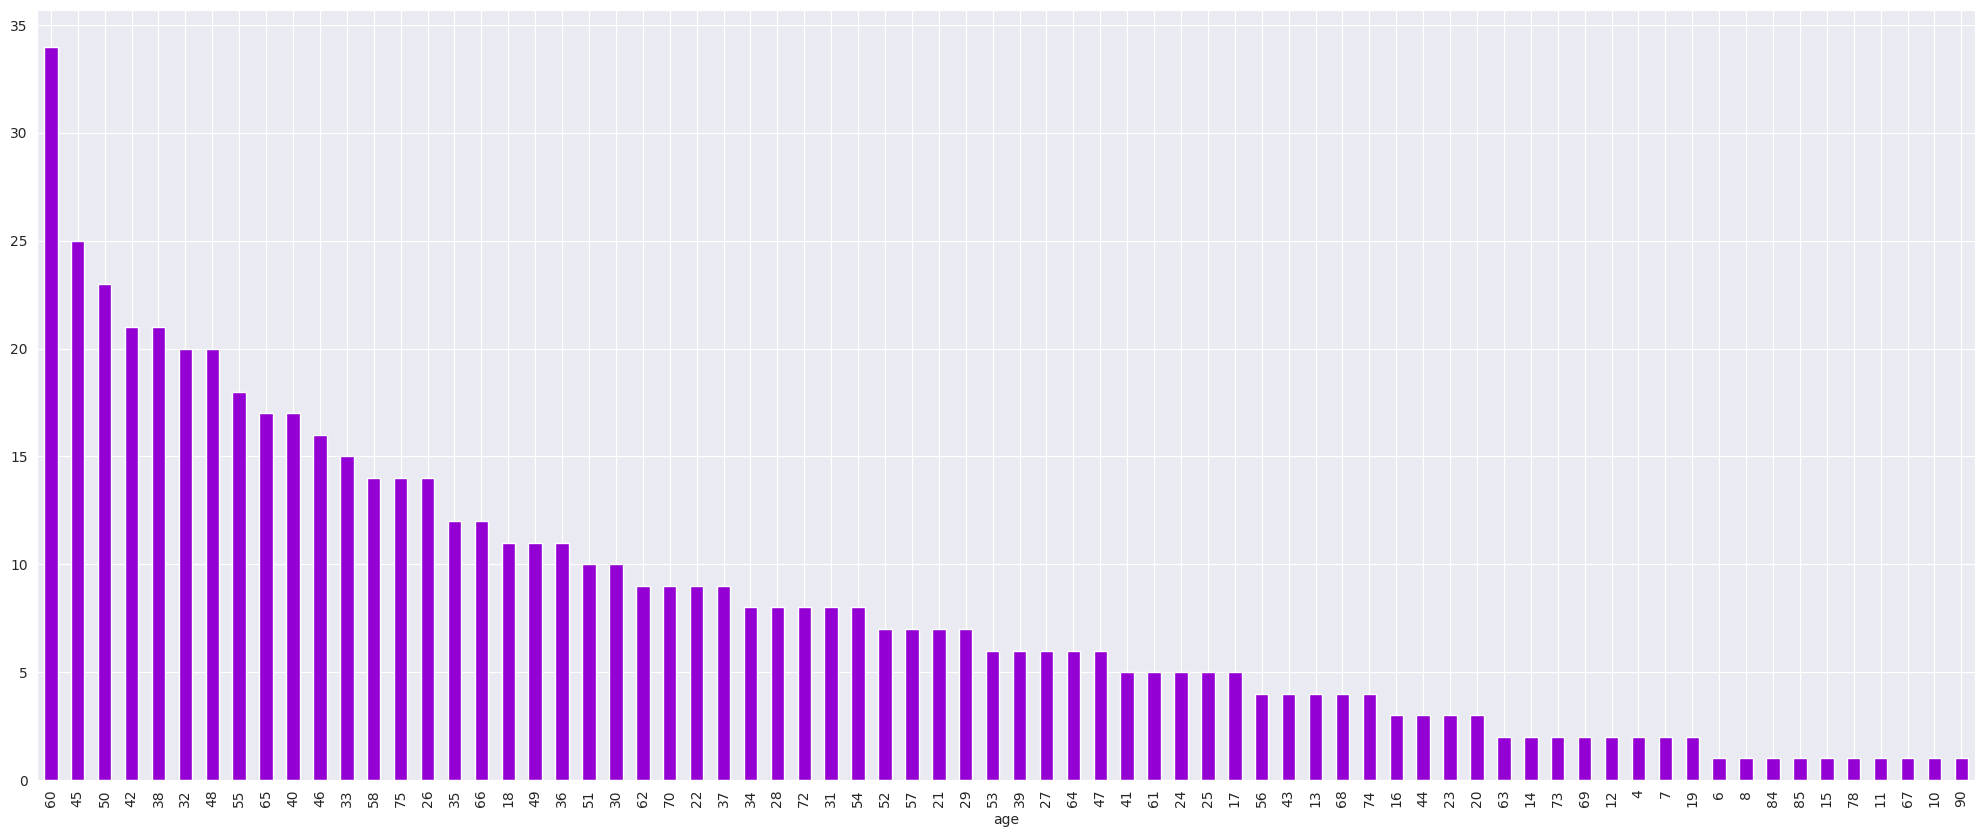

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['age'].value_counts().plot.bar(color='darkviolet')

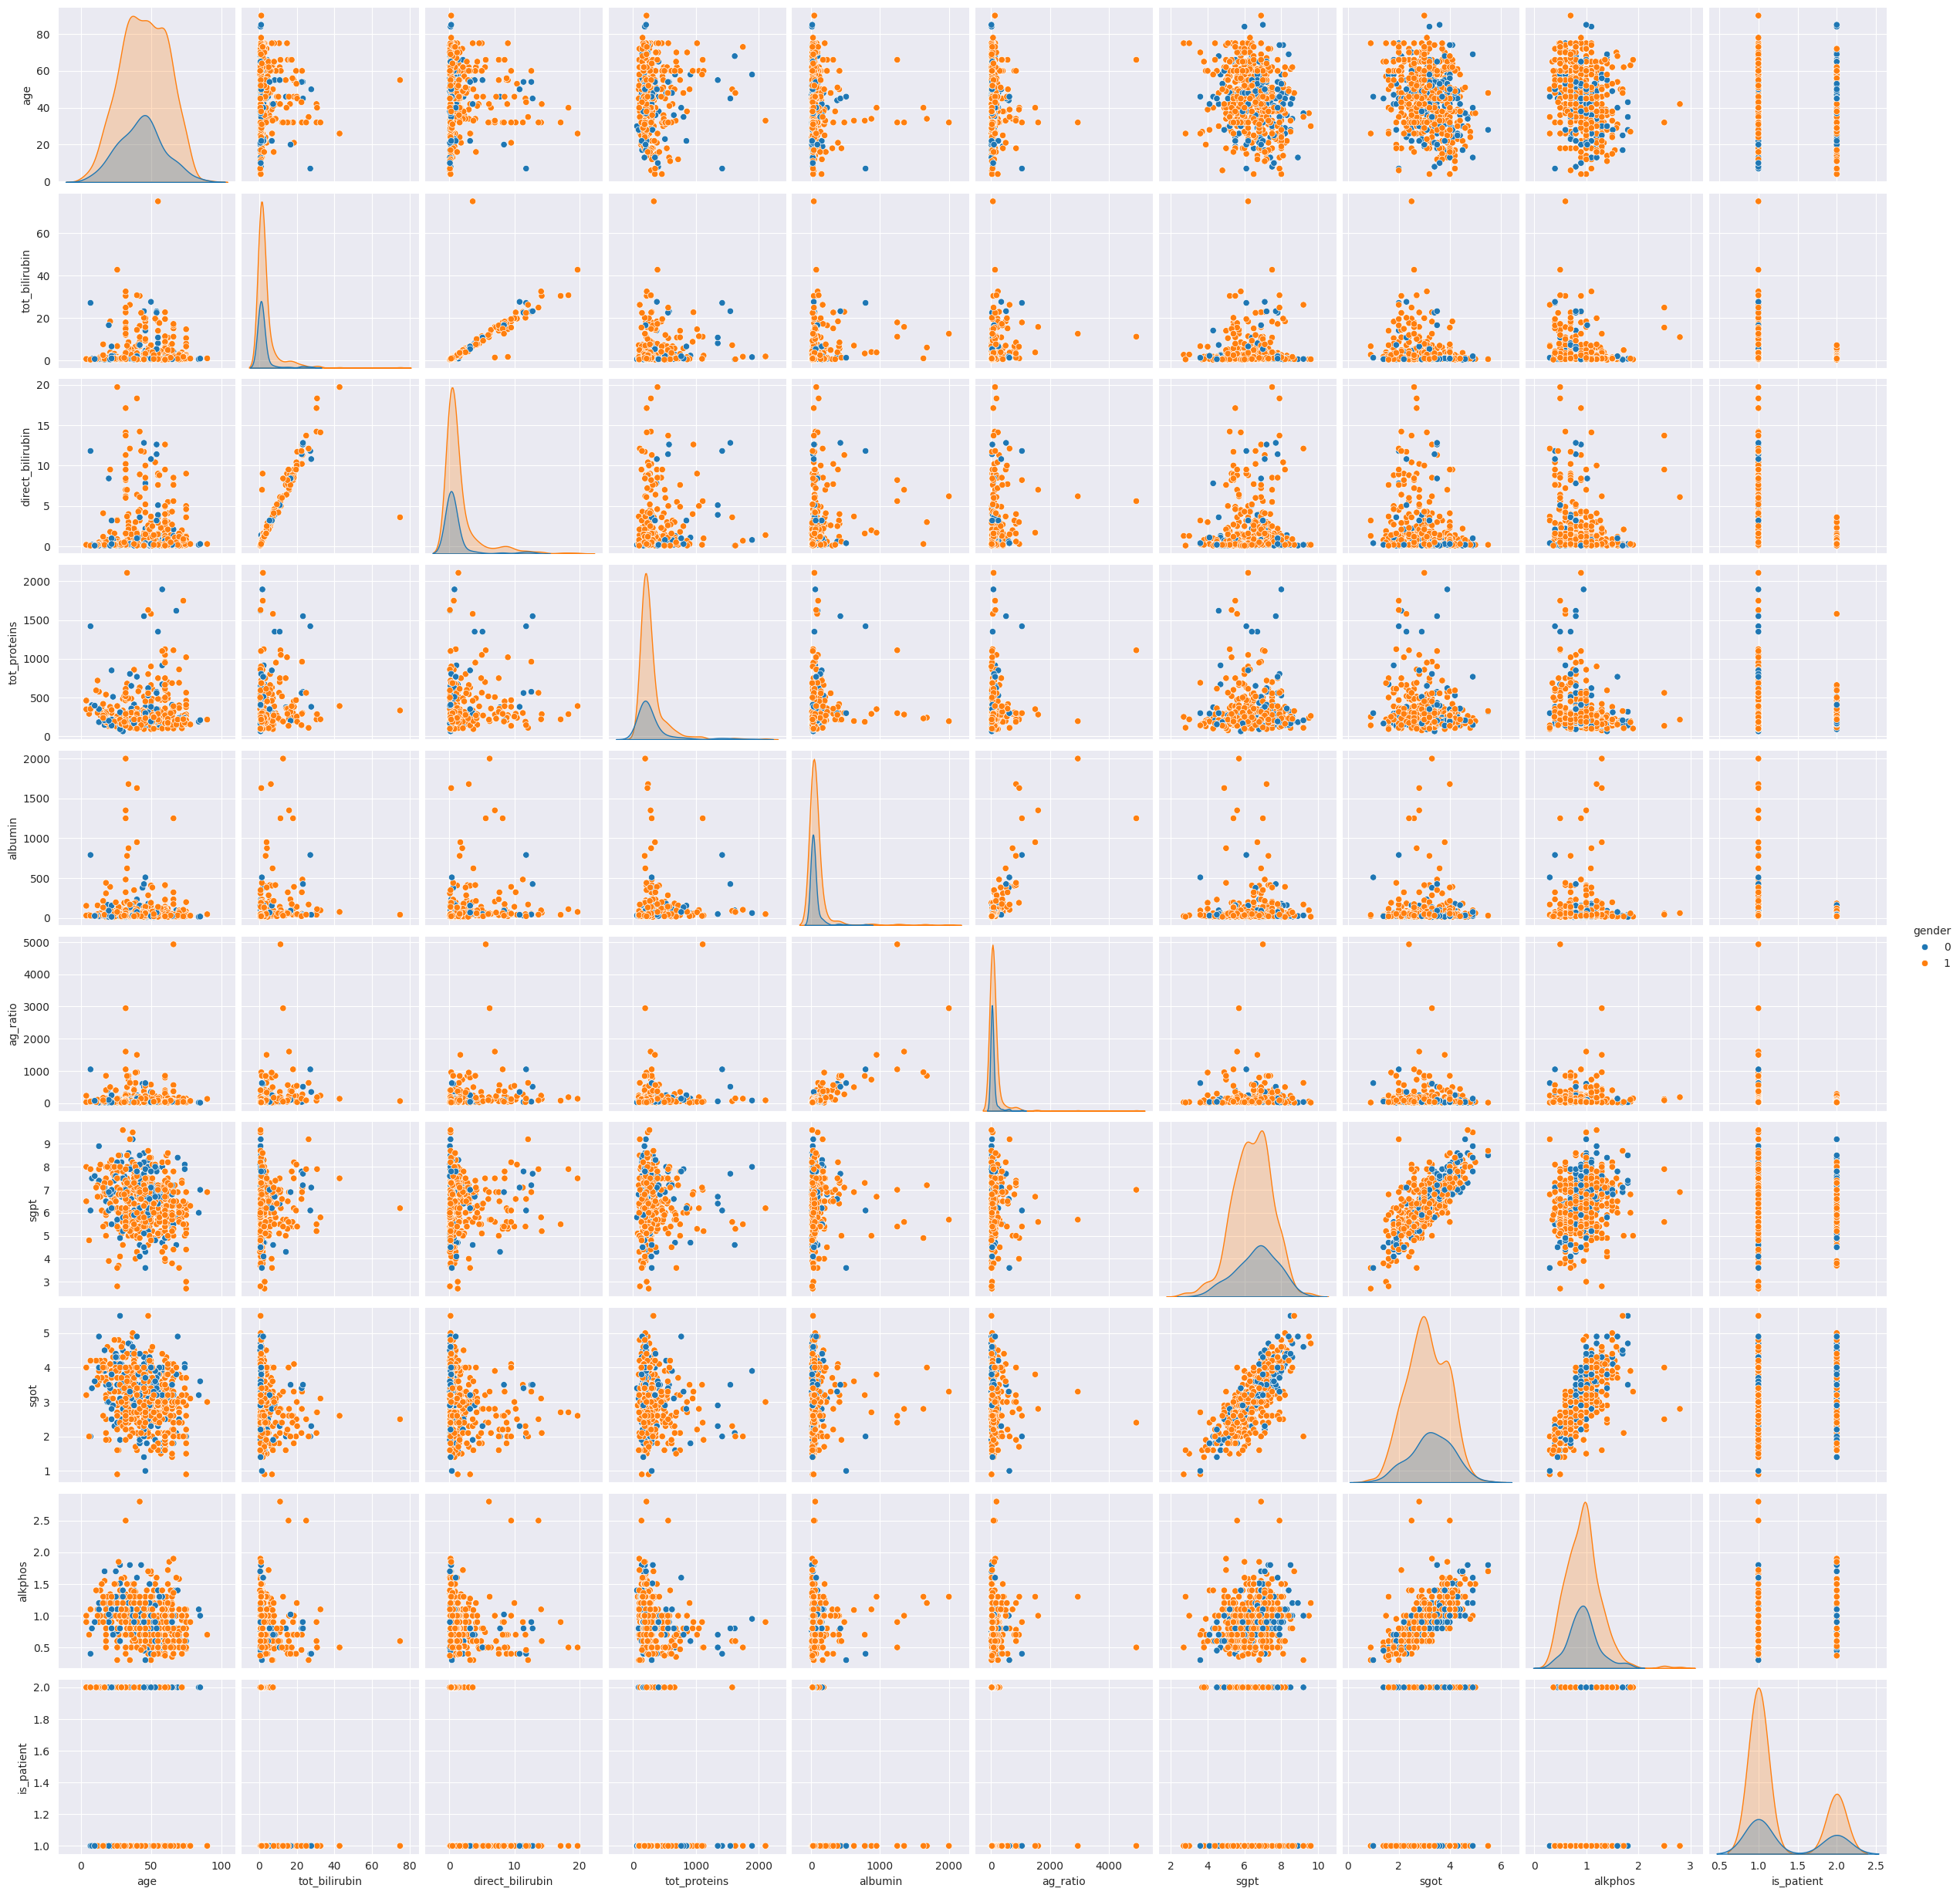

In [15]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='gender')

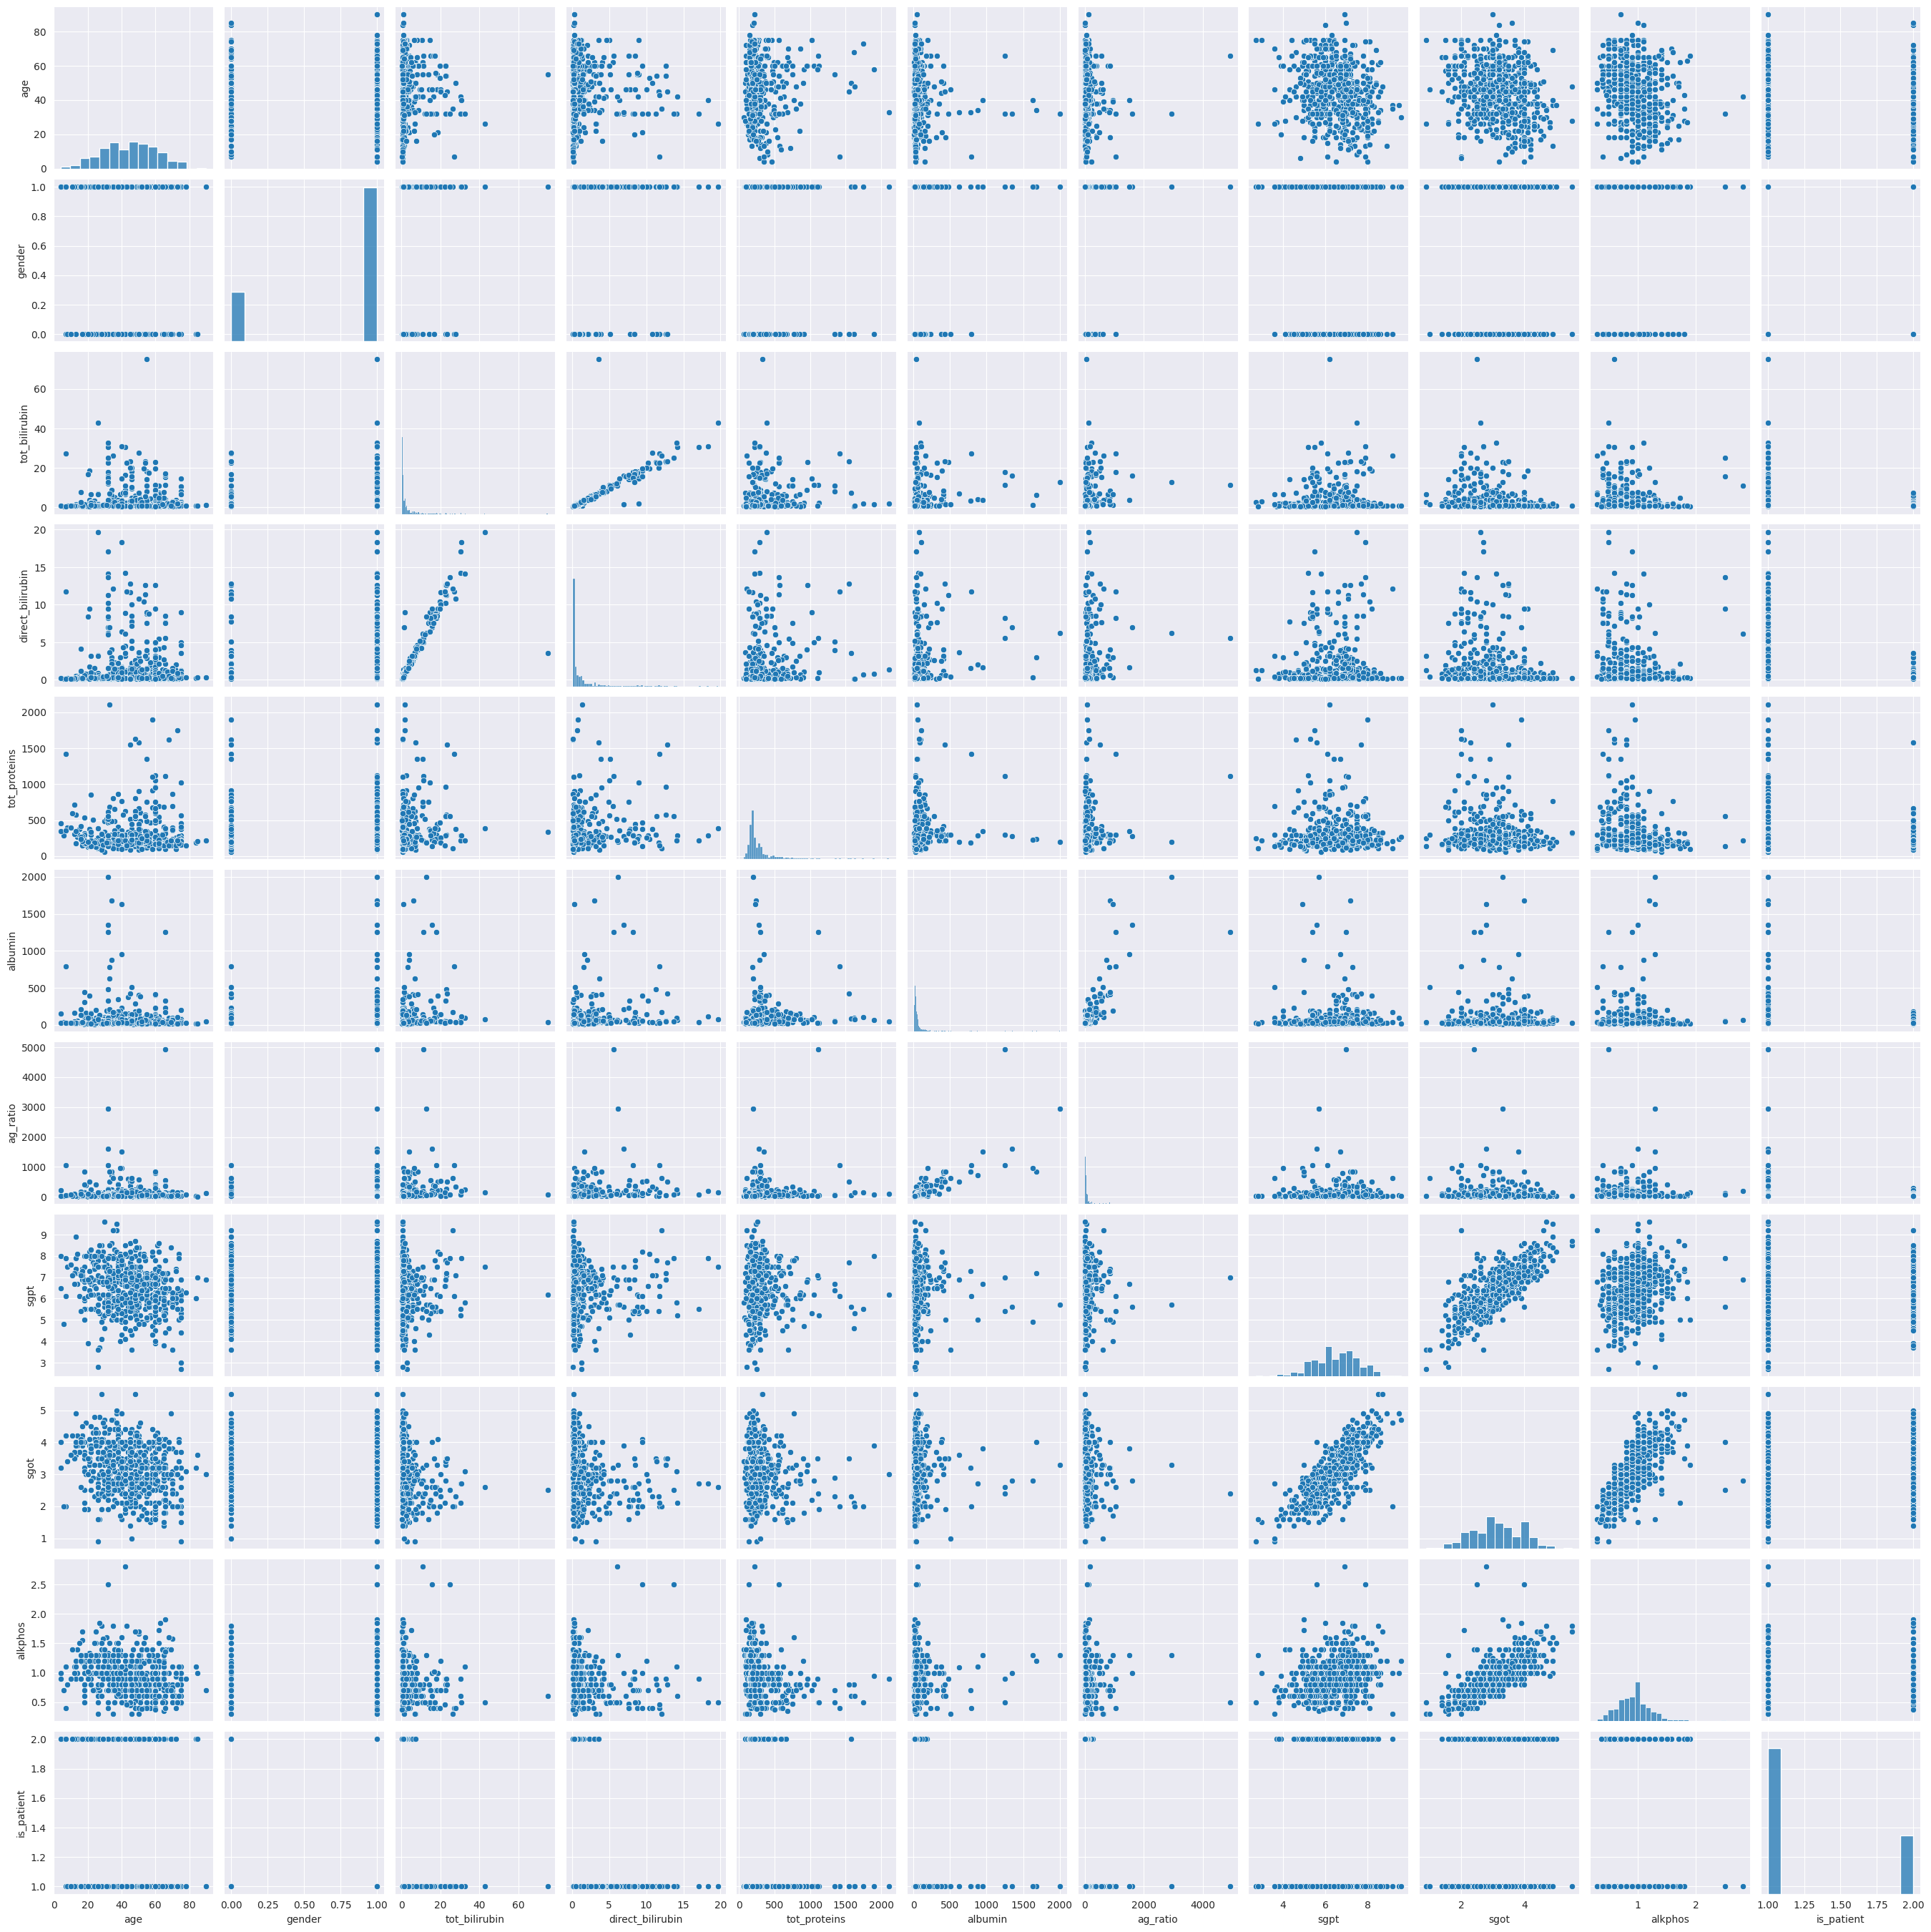

In [16]:
sns.pairplot(df)


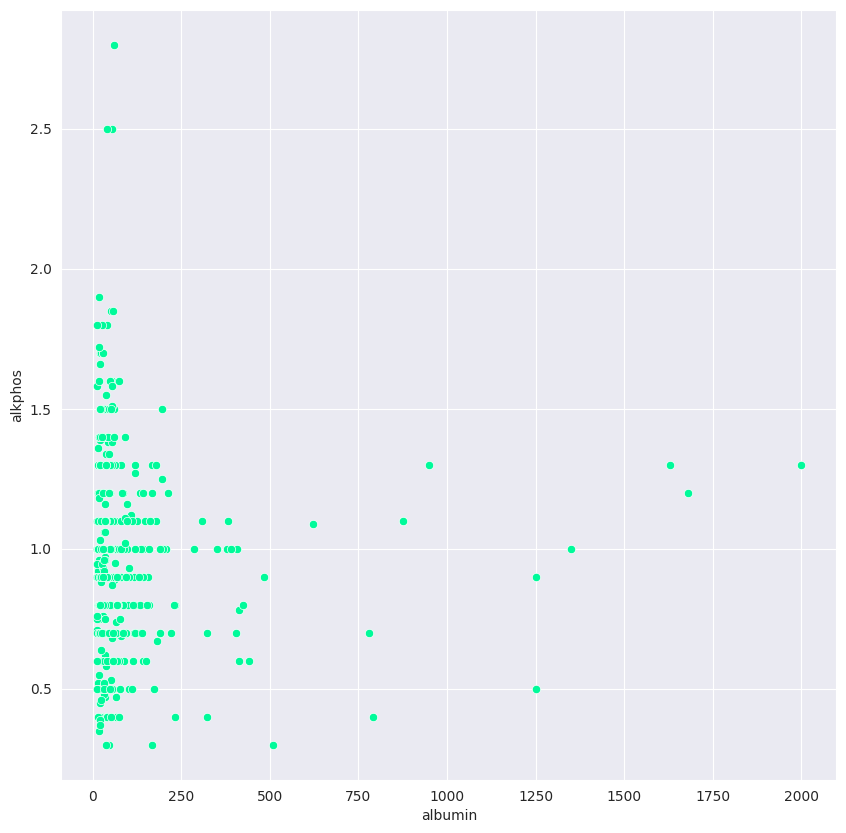

In [20]:
sns.scatterplot(x="albumin", y="alkphos",color='mediumspringgreen',data=df);
plt.show()

In [18]:
corr=df.corr()


<Axes: >

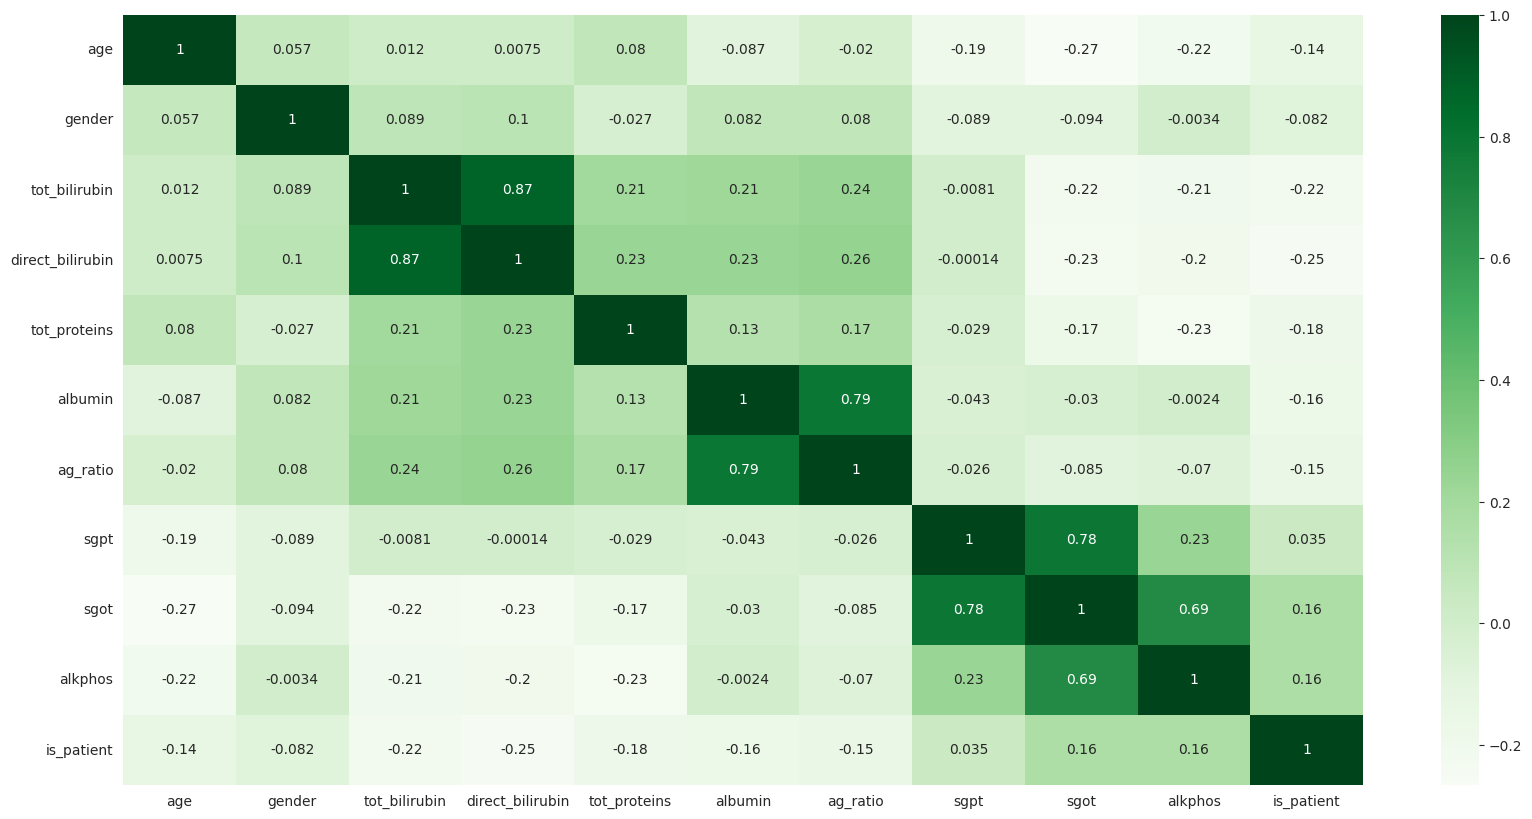

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Greens",annot=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
x=df.drop('is_patient',axis=1)
y=df['is_patient']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [26]:
from logging import log
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:


y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


0.7257142857142858

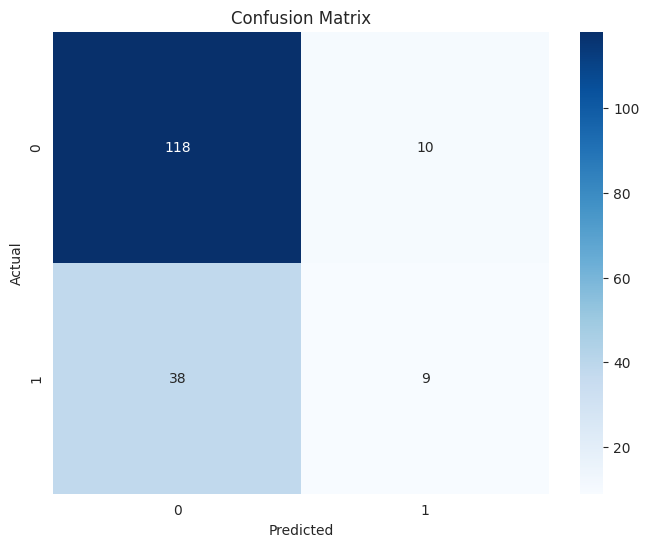

              precision    recall  f1-score   support

           1       0.76      0.92      0.83       128
           2       0.47      0.19      0.27        47

    accuracy                           0.73       175
   macro avg       0.62      0.56      0.55       175
weighted avg       0.68      0.73      0.68       175



In [32]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
